In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack, csr_matrix

In [2]:
df = pd.read_csv("../../csv_files/engagement_reddit.csv")
TEXT_COL = "text_clean"
LABEL_COL = "high_engagement"


In [3]:
df_model = df[[TEXT_COL, LABEL_COL]].dropna().copy()


X_train_df, X_test_df = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model[LABEL_COL]
)

y_train = X_train_df[LABEL_COL].values
y_test  = X_test_df[LABEL_COL].values


tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),
    min_df=2
)

X_train = tfidf.fit_transform(X_train_df[TEXT_COL])
X_test  = tfidf.transform(X_test_df[TEXT_COL])



In [5]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,400
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
pred = rf.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred, digits=3))


Confusion matrix:
 [[1039   34]
 [ 111  257]]

Report:
               precision    recall  f1-score   support

           0      0.903     0.968     0.935      1073
           1      0.883     0.698     0.780       368

    accuracy                          0.899      1441
   macro avg      0.893     0.833     0.857      1441
weighted avg      0.898     0.899     0.895      1441



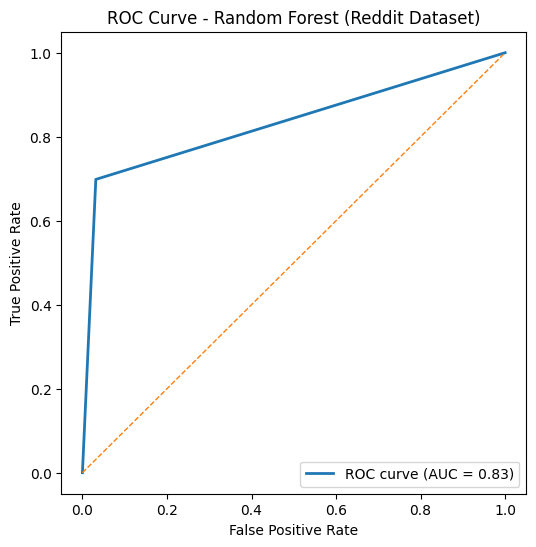

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Get decision scores (NOT probabilities)
y_scores = rf.predict(X_test)

# ROC curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Reddit Dataset)')
plt.legend(loc='lower right')
plt.show()